# Model Training

## Importing Libraries

In [1]:
import os
import io
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

## Importing Cleaned DataSet

In [8]:
train_df = pd.read_csv("dataset/cleaned_data_train.csv")
test_df = pd.read_csv("dataset/cleaned_data_test.csv")

In [13]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

## Splitting Dataset

In [14]:
X_train, y_train = train_df['tweet'], train_df['sentiment']
X_test, y_test = test_df['tweet'], test_df['sentiment']

In [15]:
X_train.isna().sum()

np.int64(0)

## Model training 

### Vectorizing the text

In [16]:
vectorizer = CountVectorizer(stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### Training Multinomial Naive Bayes Model

In [17]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


### Evaluation and testing

In [18]:
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       266
           1       0.78      0.91      0.84       277
           2       0.93      0.75      0.83       285
           3       0.89      0.72      0.80       172

    accuracy                           0.83      1000
   macro avg       0.85      0.82      0.83      1000
weighted avg       0.84      0.83      0.83      1000



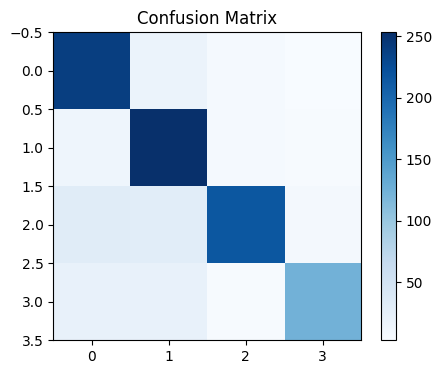

In [19]:
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.savefig("confusion_matrix.png")

Text(0, 0.5, 'Count')

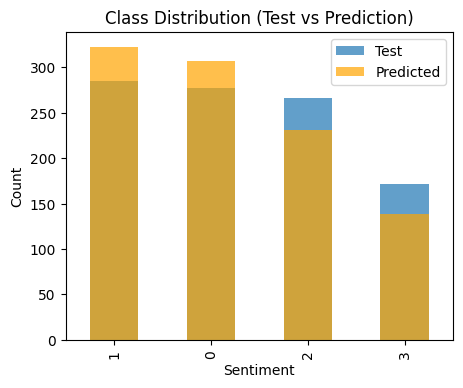

In [23]:
prediction = pd.DataFrame({"sentiment":y_pred})
plt.figure(figsize=(5,4))
test_df['sentiment'].value_counts().plot(kind="bar", alpha=0.7, label="Test")
prediction['sentiment'].value_counts().plot(kind="bar", alpha=0.7, label="Predicted", color="orange")
plt.legend()
plt.title("Class Distribution (Test vs Prediction)")
plt.xlabel("Sentiment")
plt.ylabel("Count")

## Saving Model as Pickle

In [24]:
import pickle

In [26]:
with open('Models/SentimentAnalyser.pkl', 'wb') as file:
    pickle.dump(model, file)

In [27]:
with open('Models/Vectorizor.pkl','wb') as file:
    pickle.dump(vectorizer,file)